In [2]:
from itertools import cycle
from time import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.datasets.samples_generator import make_blobs

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
## 产生模拟数据
xx = np.linspace(-22, 22, 10)  # 产生等差数列从-22到22总计10个数
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                       np.ravel(yy)[:, np.newaxis]))  # 产生数据中心
# 产生10万条特征属性是2，类别是100,符合高斯分布的数据集
X, y = make_blobs(n_samples=100000,n_features=2, centers=n_centres, random_state=28)

In [5]:
#创建不同的参数（簇直径）Birch层次聚类
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=0.5, n_clusters=None),
    Birch(threshold=1.7, n_clusters=100)
]
# threshold：簇直径的阈值，    branching_factor：大叶子个数

#  我们也可以加参数来试一下效果，比如加入分支因子branching_factor，给定不同的参数值，看聚类的结果 

C:\Software\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


Birch算法，参数信息为：直径=1.7;n_lusters=None；模型构建消耗时间为:2.326秒；聚类中心数目:171
Birch算法，参数信息为：直径=0.5;n_clusters=None；模型构建消耗时间为:5.408秒；聚类中心数目:3205
Birch算法，参数信息为：直径=1.7;n_lusters=100；模型构建消耗时间为:2.370秒；聚类中心数目:100


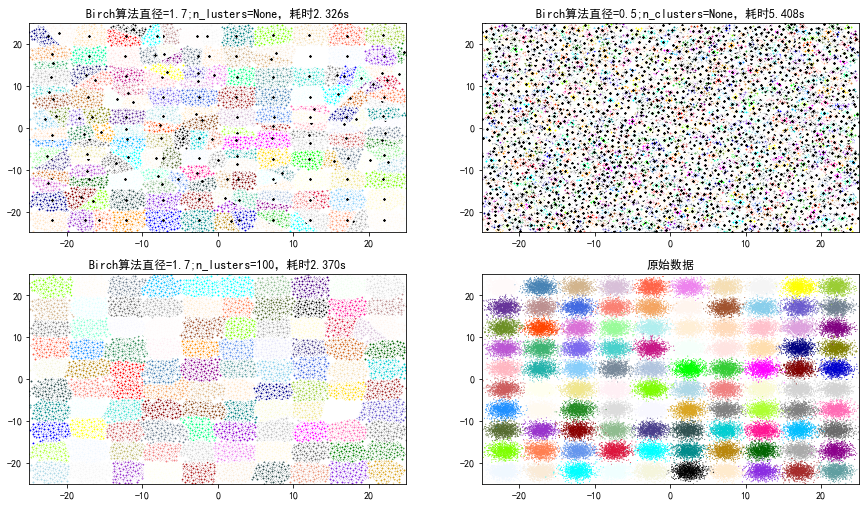

In [6]:
## 画图
final_step = [u'直径=1.7;n_lusters=None',u'直径=0.5;n_clusters=None',u'直径=1.7;n_lusters=100']

plt.figure(figsize=(12,8),facecolor='w')
plt.subplots_adjust(left = 0.02, right = 0.98, bottom = 0.1,top = 0.9)
colors_ = cycle(colors.cnames.keys())
cm = mpl.colors.ListedColormap(colors.cnames.keys())

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    # 获取模型结果（label和中心点）    
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = len(np.unique(centroids))
    print ("Birch算法，参数信息为：%s；模型构建消耗时间为:%.3f秒；聚类中心数目:%d" % (info, time_, len(np.unique(labels))))
    
    ## 画图
    subinx = 221 + ind
    plt.subplot(subinx)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=col, marker='.')
        if birch_model.n_clusters is None:
            plt.plot(this_centroid[0], this_centroid[1], '*', markerfacecolor=col, markeredgecolor='k', markersize=2)
    plt.ylim([-25, 25])
    plt.xlim([-25, 25])
    plt.title(u'Birch算法%s，耗时%.3fs' % (info, time_))
    plt.grid(False)

## 原始数据集显示
plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=cm, edgecolors='none')
plt.ylim([-25, 25])
plt.xlim([-25, 25])
plt.title(u'原始数据')
plt.grid(False)
    
plt.show()